In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
from   matplotlib.colors import LogNorm

import compute_charge_dist as fz

from scipy.optimize import curve_fit

import time

%matplotlib inline


grain_type = "silicate"
#grain_type = "carbonaceous"
pcent      = 50

########################################################################################

grain_size = 5

save_dir = "/home/jcibanezm/codes/run/ChargeStatisticsAnalysis/Daikaiju"
filename = "fz_%.4iAA_%s_CR_True_%i_pcent.pkl"%(grain_size, grain_type, pcent) 

pkl_file    = open("%s/%s"%(save_dir, filename), "rb")
cdist = pickle.load(pkl_file)
pkl_file.close

Loading the library to compute the charge distribution of dust grains.


<function close>

In [12]:
# Computing the new fz and zminmax

new_zminmax = np.zeros_like(cdist["zminmax"])
new_ffz = []

cm = 0
for i in range(len(cdist["zmean"])):
#for i in range(100):
    new_zminmax[i*2]     = -1 
    new_zminmax[i*2 + 1] = 2
    
    for k in range(4):
        new_ffz.append(cdist["fdist"][i*14 + k])
        
new_ffz = np.array(new_ffz)

In [13]:
# Compute new zmean and zstd

new_zmean = np.zeros_like(cdist["zmean"])
new_zstd  = np.zeros_like(cdist["zstd"])

ZZ = np.array([-1, 0, 1, 2])

for i in range(len(cdist["zmean"])):
#for i in range(100):
    ffz = new_ffz[i*4:i*4+4]
    new_zmean[i], new_zstd[i] = fz.weighted_avg_and_std(ZZ, ffz)

In [18]:
G_CR = np.zeros_like(cdist["Av"])

for ii in range(len(G_CR)):
    if cdist["nH"][ii] < 100:
        G_CR[ii] = 1.0e-10
    else:
        G_CR[ii] = fz.get_G_CR(cdist["fH2shield"][ii])

In [19]:
GTn   = (cdist["G"] + G_CR) * np.sqrt(cdist["temp"]) / cdist["ne"] 

In [26]:
ccdist = {"info":"new dictionary with information"}
ccdist["zmean"] = new_zmean
ccdist["cstd"] = new_zstd
ccdist["fdist"] = new_ffz
ccdist["zminmax"] = new_zminmax
ccdist["G_CR"] = G_CR

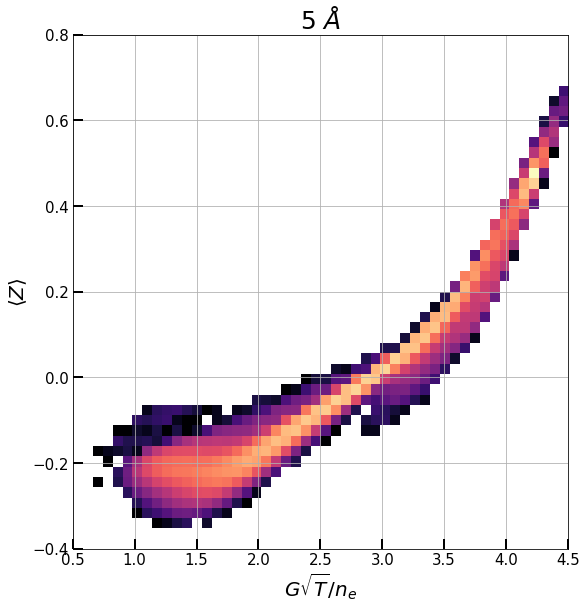

In [28]:
xsize = 8
ysize = 8.4

nfigs_x = 1
nfigs_y = 1

fig = plt.figure(figsize=(xsize, ysize))

hpad = 0.09
wpad = 0.13

xs_panel = 0.86 / nfigs_x 
ys_panel = 0.85 / nfigs_y 

############################################################################################################
############################               5 Angstroms             #######################################
############################################################################################################

ii = 0
jj = 0

ax = fig.add_axes([wpad + ii*xs_panel+ii*wpad, hpad + jj*ys_panel, xs_panel, ys_panel])

ax.hist2d(np.log10(GTn), ccdist["zmean"], bins=50, norm=LogNorm(), normed=True, cmap="magma", range=[[0.5, 4.5],[-0.4, 0.8]])

GTn_arr = np.logspace(np.log10(np.min(GTn)), np.log10(np.max(GTn)))
#NewPar  = function(GTn_arr, )

#ax.plot(GTn_arr, NewPar, "-k", linewidth=2)

ax.tick_params(axis='both', which='major', length=10, width=2,  labelsize=15, direction="in")
ax.tick_params(axis='both', which='minor', length=5, width=1.5, labelsize=15, direction="in")

ax.set_xlabel("$G\\sqrt{T} / n_{e}$", fontsize=20)
ax.set_ylabel("$\\langle Z \\rangle$", fontsize=20)

ax.grid("on")

ax.set_title("%i $\\AA$"%grain_size, fontsize=25)
fig.show()


In [29]:
# New function like a press schechter like, combining a power law and an exponential growth.

# New function including powers between -3, 3
# def function(x,alpha1, beta1, gamma1, alpha2, beta2, gamma2):
def function(x, alpha, aa, bb, hh):

    Zcent = aa * (x[:])**alpha * (1.0 - np.exp(-x[:]/hh)) + bb
    
    return Zcent

In [30]:
Zparam   = function(GTn, 0.3573 , 0.0219 , -0.2390 , 117.)

In [31]:
rel_error    = abs(Zparam    - cdist["zmean"])/abs(cdist["zmean"])

In [32]:
percentile = np.percentile(rel_error, [25, 50, 75])*100

In [33]:
print(percentile)

[ 1.3307893   4.1960359  10.35426509]


In [83]:
hst = np.histogram(rel_error, bins=bins, normed=True)

/home/jcibanezm/codes/libs/miniconda3/lib/python2.7/site-packages/ipykernel/__main__.py:1: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  if __name__ == '__main__':


In [92]:
hst[0]

array([4.87780585e-05, 1.11213973e-04, 1.81454378e-04, 2.71206005e-04,
       4.44855894e-04, 7.02404042e-04, 1.11213973e-03, 1.81649490e-03,
       2.94229249e-03, 4.58318638e-03, 7.35768234e-03, 1.19135530e-02,
       1.87249211e-02, 3.07965150e-02, 4.83975896e-02, 7.80800138e-02,
       1.26463946e-01, 2.01369483e-01, 3.54913056e-01, 1.03941750e+00,
       6.48664280e-01, 8.67301196e-01, 1.03452994e+00, 1.08898381e+00,
       1.06036085e+00, 8.32631703e-01, 4.36518748e-01, 2.08951545e-01,
       1.12497812e-01, 6.46309275e-02, 3.82790692e-02, 2.32710361e-02,
       1.42646554e-02, 9.03954980e-03, 5.78897998e-03, 3.56665164e-03,
       2.04867846e-03, 1.42431931e-03, 8.89711787e-04, 5.28754154e-04,
       3.74615489e-04, 1.99014479e-04, 1.44383053e-04, 8.97516276e-05,
       7.02404042e-05, 3.12179574e-05, 7.80448936e-06, 2.14623457e-05,
       5.85336702e-06, 7.80448936e-06, 3.90224468e-06, 3.90224468e-06,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
      

In [89]:
len(hst[0])

59

In [106]:
hst = np.histogram(rel_error, bins=bins, normed=False)
norm = np.max(hst[0])

/home/jcibanezm/codes/libs/miniconda3/lib/python2.7/site-packages/ipykernel/__main__.py:1: DeprecationWarning: Passing normed=False is deprecated, and has no effect. Consider passing the density argument instead.
  if __name__ == '__main__':


In [111]:
print(np.sum(hst[0]))

4297414


In [116]:
hst[0]/4297414.

array([5.81745208e-06, 1.32637907e-05, 2.16409217e-05, 3.23450335e-05,
       5.30551629e-05, 8.37713099e-05, 1.32637907e-04, 2.16641915e-04,
       3.50908709e-04, 5.46607797e-04, 8.77504471e-04, 1.42085450e-03,
       2.23320350e-03, 3.67290654e-03, 5.77207595e-03, 9.31211189e-03,
       1.50825590e-02, 2.40160711e-02, 4.23282467e-02, 1.23964784e-01,
       7.73621066e-02, 1.03437556e-01, 1.23381876e-01, 1.29876247e-01,
       1.26462566e-01, 9.93027435e-02, 5.20608440e-02, 2.49203358e-02,
       1.34169061e-02, 7.70812400e-03, 4.56530369e-03, 2.77539004e-03,
       1.70125569e-03, 1.07809022e-03, 6.90415212e-04, 4.25372096e-04,
       2.44332987e-04, 1.69869601e-04, 1.06110326e-04, 6.30611805e-05,
       4.46780320e-05, 2.37352045e-05, 1.72196581e-05, 1.07041118e-05,
       8.37713099e-06, 3.72316933e-06, 9.30792332e-07, 2.55967891e-06,
       6.98094249e-07, 9.30792332e-07, 4.65396166e-07, 4.65396166e-07,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
      

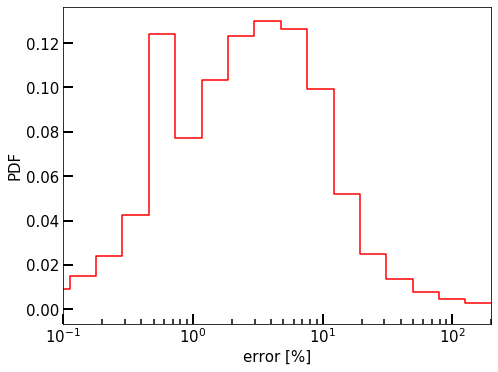

In [131]:
fig = plt.figure(figsize=(7,5))
ax = fig.add_axes([0.12, 0.105, 0.85, 0.88])

bins = np.logspace(-6, 6, num=60)

#ax.hist(rel_error, bins=bins, histtype="step", color="red", range=[1.0e-6,1.0e6], normed=False, )
ax.plot(hst[1][0:len(hst[0])]*100., hst[0]/4297414., "-r", linestyle="steps")

#ax.set_yscale("log")
ax.set_xscale("log")

ax.set_xlim(0.1, 200)
#ax.set_xlim(1, 20)

ax.tick_params(axis='both', which='major', length=10, width=2,  labelsize=15, direction="in")
ax.tick_params(axis='both', which='minor', length=5, width=1.5, labelsize=15, direction="in")

#ax.set_xlabel("$a_{400}$ $(G\\sqrt{T} / n_{e})^{0.58}$ - $a_{57}$", fontsize=15)
ax.set_xlabel("error [%]", fontsize=15)
ax.set_ylabel("PDF", fontsize=15)

fig.show()

fig.savefig("/home/jcibanezm/Dropbox/Projects/Papers/In_Progress/ChargeDist_Dust/Figures/Apendix/Completeness_error.pdf", format="pdf")

In [127]:
fz.get_Zmin(1000., "silicate")

-5035.0

In [128]:
fz.get_Zmax(1000., "silicate")

389.0